In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io.arff import loadarff

#muting warnings
warnings.filterwarnings('ignore')

#display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

raw_data = loadarff('house.arff')
df = pd.DataFrame(raw_data[0])
print(df.shape)

nulls_count = pd.DataFrame(df.isnull().sum(), columns=['nulls_count'])
nulls_count.loc[nulls_count.loc[:,'nulls_count']>0,:].sort_values(by='nulls_count', ascending=False)

nan_count = pd.DataFrame(df.isna().sum(), columns=['nan_count'])
nan_count.loc[nan_count.loc[:,'nan_count']>0,:].sort_values(by='nan_count', ascending=False)

display(nulls_count)
display(nan_count)

(2930, 81)


,nulls_count
MS_SubClass,0
MS_Zoning,0
Lot_Frontage,0
Lot_Area,0
Street,0
Alley,0
Lot_Shape,0
Land_Contour,0
Utilities,0
Lot_Config,0


,nan_count
MS_SubClass,0
MS_Zoning,0
Lot_Frontage,0
Lot_Area,0
Street,0
Alley,0
Lot_Shape,0
Land_Contour,0
Utilities,0
Lot_Config,0


# Analyzing null/NaN
Loading the dataframe and performing an initial analysis by checking the amount of data available.
Analyze whether there are any null or NaN fields within the dataframe.

In [2]:
df.drop_duplicates(subset=['Longitude','Latitude'], keep='last',inplace=True)
print(df.shape)
df.drop(["Latitude","Longitude", "Pool_QC", "Misc_Feature", "Mo_Sold"],axis = 1 , inplace=True)

(2924, 81)


# Removing redundant features

Analysing whether there are any entries that share the same latitude and longitude value, eliminating them according to the 'keep=last' criterion.

Removing features that in our opinion are redundant in information or too specific.

- Pool_QC is redundant with Pool_Area, because if Pool_Area is 0, we obviously have no pool.

- Latitude and Longitude because we already know the location of the property from the feature 'Neighborhood', also we cannot get information from it, as it will be different for each entry.

- Misc_Feature is redundant to Misc_Val, analogous to Pool_QC

- Mo_Sold is redundant and too specific compared to Year_Sold

In [3]:
nominal_columns = list(col for col in df.select_dtypes([object]).columns)
nominal_stats = {'column': [], 'percentage':[]}

columns_to_drop = []
for column in nominal_columns:
    val = df[column].value_counts().idxmax()
    mean = df[column].eq(val).mean()
    if mean > 0.9:
        columns_to_drop.append(column)
        nominal_stats['column'].append(column)
        nominal_stats['percentage'].append(int(mean * 100) / 100)

nominal_stats_df = pd.DataFrame(nominal_stats)
display(nominal_stats_df)

df.drop(columns_to_drop, axis=1, inplace=True)

,column,percentage
0,Street,0.99
1,Alley,0.93
2,Utilities,0.99
3,Land_Slope,0.95
4,Condition_2,0.98
5,Roof_Matl,0.98
6,Heating,0.98
7,Central_Air,0.93
8,Electrical,0.91
9,Functional,0.93


# Removing skewed features

Taking all features of object type and calculate their modal value, observe the frequency of this value compared to the entries, to find the distorted features
The chosen threshold is 90%.

In [4]:
quality_and_conditions=[]

#Adding qualitative categorical features
for columns in df.columns:
    if '_Qual' in columns or '_Cond' in columns:
        quality_and_conditions.append(columns)

#Removing Sale_Condition and Low_Qual_Fin_SF because they are not a qualitative categorical feature
quality_and_conditions.remove('Sale_Condition')
quality_and_conditions.remove('Low_Qual_Fin_SF')

#Adding Bsmt_Exposure, Heating_QC and Fireplace_Qu because they are qualitative categorical features
quality_and_conditions.append('Bsmt_Exposure')
quality_and_conditions.append('Heating_QC')
quality_and_conditions.append('Fireplace_Qu')

for x in quality_and_conditions:
    print(x)
    print(df[x].unique(), '\n')

def replace(col, map_dict, verbose=True, dataset=df):
    if verbose:
        print('Original values of {}:'.format(col))
        display(dataset.loc[:,col].value_counts(dropna=False))

    result = dataset.loc[:,col]
    result = result.replace(map_dict)
    if verbose:
        print('After re-mapping {}:'.format(col))
        display(result.value_counts(dropna=False))

    return result

df.loc[:,'Overall_Qual'] = replace('Overall_Qual',
{b'Very_Poor':0,b'Poor':1,b'Fair':2,b'Below_Average':3,b'Average':4,b'Above_Average':5,b'Good':6,b'Very_Good':7,b'Excellent':8,b'Very_Excellent':9})

df.loc[:,'Overall_Cond'] = replace('Overall_Cond',
{b'Very_Poor':0,b'Poor':1,b'Fair':2,b'Below_Average':3,b'Average':4,b'Above_Average':5,b'Good':6,b'Very_Good':7,b'Excellent':8})

df.loc[:,'Exter_Qual'] = replace('Exter_Qual',
{b'Fair':0,b'Typical':1,b'Good':2,b'Excellent':3})

df.loc[:,'Exter_Cond'] = replace('Exter_Cond',
{b'Poor':0,b'Fair':1,b'Typical':2,b'Good':3,b'Excellent':4})

df.loc[:,'Bsmt_Qual'] = replace('Bsmt_Qual',
{b'No_Basement':0,b'Poor':1,b'Fair':2,b'Typical':3,b'Good':4,b'Excellent':5})

df.loc[:,'Bsmt_Cond'] = replace('Bsmt_Cond',
{b'No_Basement':0,b'Poor':1,b'Fair':2,b'Typical':3,b'Good':4,b'Excellent':5})

df.loc[:,'Kitchen_Qual'] = replace('Kitchen_Qual',
{b'Poor':0,b'Fair':1,b'Typical':2,b'Good':3,b'Excellent':4})

df.loc[:,'Garage_Qual'] = replace('Garage_Qual',
{b'No_Garage':0,b'Poor':1,b'Fair':2,b'Typical':3,b'Good':4,b'Excellent':5})

df.loc[:, 'Bsmt_Exposure'] = replace('Bsmt_Exposure',
{b'No_Basement':0, b'No':1, b'Mn':2, b'Av':3, b'Gd':4})

df.loc[:, 'Heating_QC'] = replace('Heating_QC',
{b'Poor':0,b'Fair':1,b'Typical':2,b'Good':3,b'Excellent':4})

df.loc[:, 'Fireplace_Qu'] = replace('Fireplace_Qu',
{b'No_Fireplace':0,b'Poor':1,b'Fair':2,b'Typical':3,b'Good':4,b'Excellent':5})

display(df.loc[:, quality_and_conditions])

Overall_Qual
[b'Above_Average' b'Average' b'Good' b'Very_Good' b'Excellent'
 b'Below_Average' b'Fair' b'Poor' b'Very_Excellent' b'Very_Poor'] 

Overall_Cond
[b'Average' b'Above_Average' b'Good' b'Poor' b'Very_Good' b'Below_Average'
 b'Excellent' b'Fair' b'Very_Poor'] 

Exter_Qual
[b'Typical' b'Good' b'Excellent' b'Fair'] 

Exter_Cond
[b'Typical' b'Good' b'Fair' b'Poor' b'Excellent'] 

Bsmt_Qual
[b'Typical' b'Good' b'Excellent' b'No_Basement' b'Fair' b'Poor'] 

Bsmt_Cond
[b'Good' b'Typical' b'No_Basement' b'Poor' b'Fair' b'Excellent'] 

Kitchen_Qual
[b'Typical' b'Good' b'Excellent' b'Fair' b'Poor'] 

Garage_Qual
[b'Typical' b'No_Garage' b'Fair' b'Good' b'Excellent' b'Poor'] 

Bsmt_Exposure
[b'Gd' b'No' b'Mn' b'Av' b'No_Basement'] 

Heating_QC
[b'Fair' b'Typical' b'Excellent' b'Good' b'Poor'] 

Fireplace_Qu
[b'Good' b'No_Fireplace' b'Typical' b'Poor' b'Excellent' b'Fair'] 

Original values of Overall_Qual:


b'Average'           825
b'Above_Average'     726
b'Good'              602
b'Very_Good'         350
b'Below_Average'     226
b'Excellent'         107
b'Fair'               40
b'Very_Excellent'     31
b'Poor'               13
b'Very_Poor'           4
Name: Overall_Qual, dtype: int64

After re-mapping Overall_Qual:


4    825
5    726
6    602
7    350
3    226
8    107
2     40
9     31
1     13
0      4
Name: Overall_Qual, dtype: int64

Original values of Overall_Cond:


b'Average'          1654
b'Above_Average'     527
b'Good'              390
b'Very_Good'         144
b'Below_Average'     101
b'Fair'               50
b'Excellent'          41
b'Poor'               10
b'Very_Poor'           7
Name: Overall_Cond, dtype: int64

After re-mapping Overall_Cond:


4    1654
5     527
6     390
7     144
3     101
2      50
8      41
1      10
0       7
Name: Overall_Cond, dtype: int64

Original values of Exter_Qual:


b'Typical'      1793
b'Good'          989
b'Excellent'     107
b'Fair'           35
Name: Exter_Qual, dtype: int64

After re-mapping Exter_Qual:


1    1793
2     989
3     107
0      35
Name: Exter_Qual, dtype: int64

Original values of Exter_Cond:


b'Typical'      2545
b'Good'          297
b'Fair'           67
b'Excellent'      12
b'Poor'            3
Name: Exter_Cond, dtype: int64

After re-mapping Exter_Cond:


2    2545
3     297
1      67
4      12
0       3
Name: Exter_Cond, dtype: int64

Original values of Bsmt_Qual:


b'Typical'        1282
b'Good'           1214
b'Excellent'       258
b'Fair'             88
b'No_Basement'      80
b'Poor'              2
Name: Bsmt_Qual, dtype: int64

After re-mapping Bsmt_Qual:


3    1282
4    1214
5     258
2      88
0      80
1       2
Name: Bsmt_Qual, dtype: int64

Original values of Bsmt_Cond:


b'Typical'        2610
b'Good'            122
b'Fair'            104
b'No_Basement'      80
b'Poor'              5
b'Excellent'         3
Name: Bsmt_Cond, dtype: int64

After re-mapping Bsmt_Cond:


3    2610
4     122
2     104
0      80
1       5
5       3
Name: Bsmt_Cond, dtype: int64

Original values of Kitchen_Qual:


b'Typical'      1489
b'Good'         1159
b'Excellent'     205
b'Fair'           70
b'Poor'            1
Name: Kitchen_Qual, dtype: int64

After re-mapping Kitchen_Qual:


2    1489
3    1159
4     205
1      70
0       1
Name: Kitchen_Qual, dtype: int64

Original values of Garage_Qual:


b'Typical'      2609
b'No_Garage'     159
b'Fair'          124
b'Good'           24
b'Poor'            5
b'Excellent'       3
Name: Garage_Qual, dtype: int64

After re-mapping Garage_Qual:


3    2609
0     159
2     124
4      24
1       5
5       3
Name: Garage_Qual, dtype: int64

Original values of Bsmt_Exposure:


b'No'             1901
b'Av'              418
b'Gd'              284
b'Mn'              238
b'No_Basement'      83
Name: Bsmt_Exposure, dtype: int64

After re-mapping Bsmt_Exposure:


1    1901
3     418
4     284
2     238
0      83
Name: Bsmt_Exposure, dtype: int64

Original values of Heating_QC:


b'Excellent'    1495
b'Typical'       858
b'Good'          476
b'Fair'           92
b'Poor'            3
Name: Heating_QC, dtype: int64

After re-mapping Heating_QC:


4    1495
2     858
3     476
1      92
0       3
Name: Heating_QC, dtype: int64

Original values of Fireplace_Qu:


b'No_Fireplace'    1422
b'Good'             744
b'Typical'          594
b'Fair'              75
b'Poor'              46
b'Excellent'         43
Name: Fireplace_Qu, dtype: int64

After re-mapping Fireplace_Qu:


0    1422
4     744
3     594
2      75
1      46
5      43
Name: Fireplace_Qu, dtype: int64

,Overall_Qual,Overall_Cond,Exter_Qual,Exter_Cond,Bsmt_Qual,Bsmt_Cond,Kitchen_Qual,Garage_Qual,Bsmt_Exposure,Heating_QC,Fireplace_Qu
0,5,4,1,2,3,4,2,3,4,1,4
1,4,5,1,2,3,3,2,3,1,2,0
2,5,5,1,2,3,3,3,3,1,2,0
3,6,4,2,2,3,3,4,3,1,4,3
4,4,4,1,2,4,3,2,3,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...
2925,5,5,1,2,3,3,2,3,3,2,0
2926,4,4,1,2,4,3,2,3,3,2,0
2927,4,4,1,2,4,3,2,0,3,2,0
2928,4,4,1,2,4,3,2,3,3,3,3


# Transforming qualitative categorical features into numerical

Identifying qualitative features and based on their possible values to identify a numerical scale to represent them.
This strategy has been chosen instead of one hot encoding for this particular type of features.

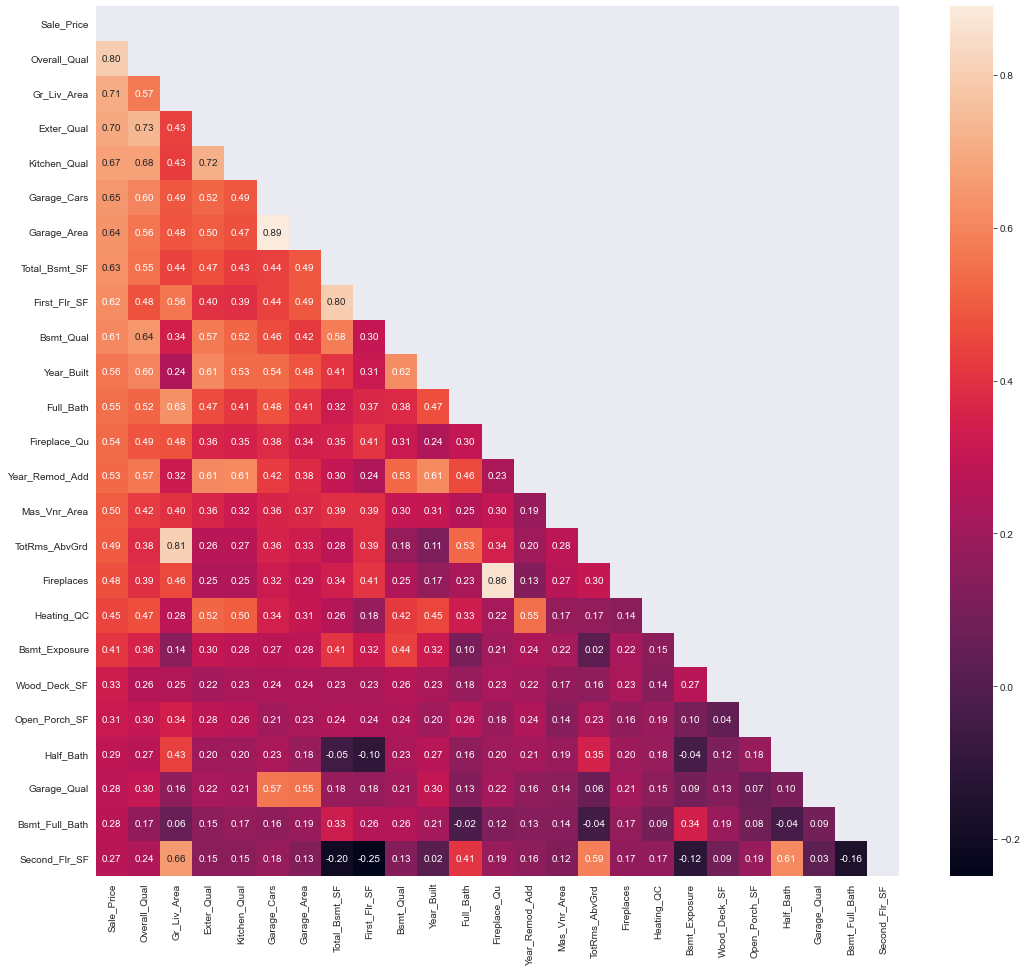

In [5]:
saleprice_correlations = df.corr().loc[:, 'Sale_Price']
top_correlations = saleprice_correlations.abs().sort_values(ascending=False).head(25)
top_correlations = df.loc[:, list(top_correlations.index)].corr()

mask = np.zeros_like(top_correlations)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(18, 16))

sns.heatmap(top_correlations, annot=True, annot_kws={"size":10}, fmt='.2f', mask=mask)
plt.show()

# Features correlation

Using a heatmap to observe the correlation of features.
Reasoning on features that have a high correlation with each other and express the same information

In [6]:
df.drop(columns=['Garage_Cars', 'TotRms_AbvGrd'], inplace=True)

We notice collinearity between Garage_Cars and Garage_Area, we decide to keep only the area, because it is more expressive.
Similar for TotRms_AbvGrd and Gr_Liv_Are

In [7]:
# Save dataset without splitting for PCA
X = df.drop(columns=['Sale_Price'])
y = df.loc[:, 'Sale_Price']

X.to_csv('x_cleaned_pca.csv', index=False)
y.to_csv('y_cleaned_pca.csv', index=False)

In [8]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=4, random_state=1, shuffle=True)

for train, test in skf.split(X, y):
    X_train = X.iloc[train]
    y_train = y.iloc[train]
    X_test = X.iloc[test]
    y_test = y.iloc[test]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2193, 61) (2193,) (731, 61) (731,)


# Splitting train and test - StratifiedKFold
This cross-validation object is a variation of KFold that returns stratified folds. **The folds are made by preserving the percentage of samples for each class.**
The size of the dataset is small, to distribute the different feature values equally in both test and train in order to get an equal division and simplify the future one hot encoding.


In [9]:
X_train.to_csv('x_train_cleaned.csv', index=False)
y_train.to_csv('y_train_cleaned.csv', index=False)
X_test.to_csv('x_test_cleaned.csv', index=False)
y_test.to_csv('y_test_cleaned.csv', index=False)

# Saving cleaned data
Saving the data to csv.